In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Activation, MaxPooling2D, Flatten, Dropout, BatchNormalization, AveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [17]:
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 2.0 MB/s eta 0:00:01


In [23]:
data = pd.read_csv('../W207/age_gender.csv')

In [24]:
data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


/Users/irenej98/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


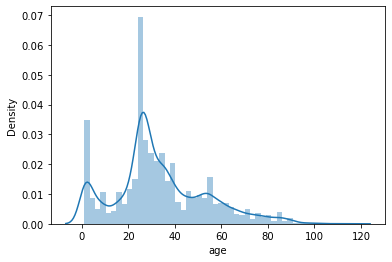

In [25]:
import matplotlib.pyplot as plt

sns.distplot(data['age'])
plt.show()

/Users/irenej98/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


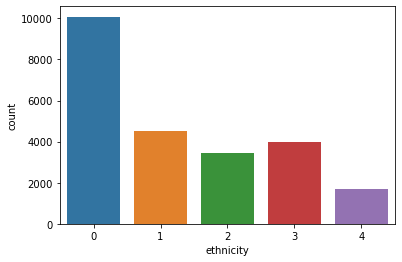

In [26]:
sns.countplot(data['ethnicity'])
plt.show()

/Users/irenej98/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


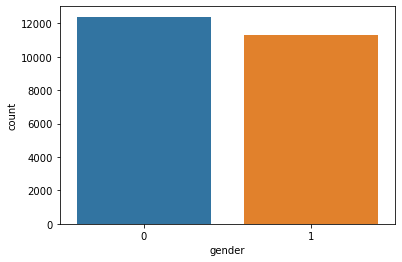

In [27]:
sns.countplot(data['gender'])
plt.show()

In [28]:
data['pixels'] = data['pixels'].map(lambda x: np.array(x.split(' '), dtype=np.float32).reshape(48, 48))

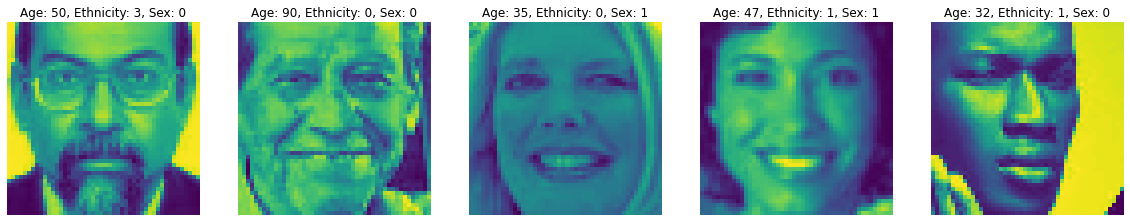

In [29]:
fig, axes = plt.subplots(1, 5, figsize=(20, 10))

for i in range(5):
    random_face = np.random.choice(len(data))
    
    age = data['age'][random_face]
    ethnicity = data['ethnicity'][random_face]
    gender = data['gender'][random_face]
    
    axes[i].set_title('Age: {0}, Ethnicity: {1}, Sex: {2}'.format(age, ethnicity, gender))
    axes[i].imshow(data['pixels'][random_face])
    axes[i].axis('off')

In [43]:
import matplotlib
matplotlib.image.imsave('img1.jpg', data['pixels'][0])

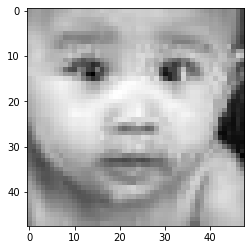

In [32]:
img = cv2.imread('img1.jpg')
plt.imshow(img)
image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap = "gray")


In [55]:
import imageio
from mlxtend.image import extract_face_landmarks

img = imageio.imread('img1.jpg')
landmarks = extract_face_landmarks(img)


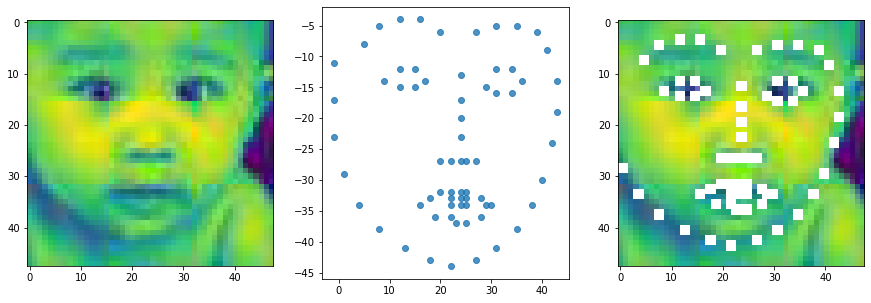

In [56]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 3, 1)
ax.imshow(img)
ax = fig.add_subplot(1, 3, 2)
ax.scatter(landmarks[:, 0], -landmarks[:, 1], alpha=0.8)
ax = fig.add_subplot(1, 3, 3)
img2 = img.copy()
for p in landmarks:
    img2[p[1]-1:p[1]+1, p[0]-1:p[0]+1, :] = (255, 255, 255)

ax.imshow(img2)
plt.show()

NameError: name 'left_eye' is not defined

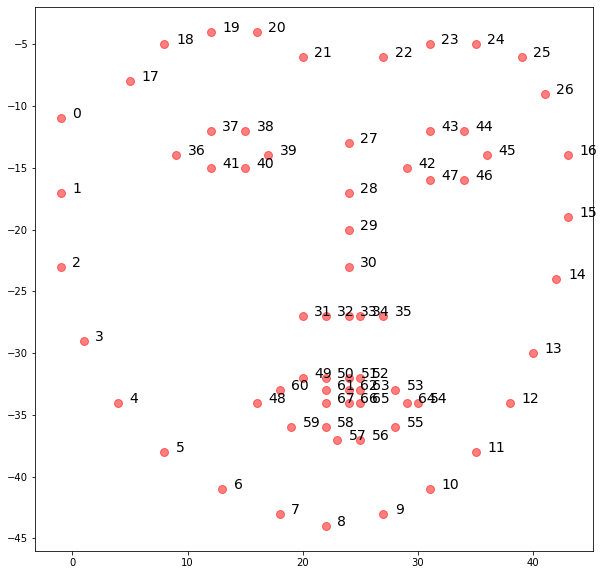

In [57]:
fig = plt.figure(figsize=(10,10))
plt.plot(landmarks[:,0], -landmarks[:,1], 'ro', markersize=8, alpha = 0.5)
for i in range(landmarks.shape[0]):
    plt.text(landmarks[i,0]+1, -landmarks[i,1], str(i), size=14)


left_eye_center = np.mean(landmarks[left_eye], axis=0)
right_eye_center = np.mean(landmarks[right_eye], axis=0)
print('Coordinates of the Left Eye: ', left_eye_center)
print('Coordinates of the Right Eye: ', right_eye_center)
plt.plot([left_eye_center[0]], [-left_eye_center[1]], 
            marker='+', color='blue', markersize=10, mew=4)

plt.plot([right_eye_center[0]], [-right_eye_center[1]], 
            marker='+', color='blue', markersize=10, mew=4)

plt.xticks([])
plt.yticks([])

plt.show()

In [113]:
matplotlib.image.imsave('img2.jpg', data['pixels'][10300])

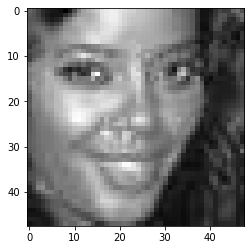

In [114]:
img2 = cv2.imread('img2.jpg')
plt.imshow(img2)
image_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap = "gray")

In [115]:
img = imageio.imread('img2.jpg')
landmarks = extract_face_landmarks(img)
landmarks

array([[-1, 10],
       [-1, 17],
       [-1, 23],
       [ 0, 30],
       [ 2, 35],
       [ 6, 40],
       [11, 44],
       [16, 47],
       [21, 48],
       [25, 46],
       [28, 41],
       [31, 37],
       [34, 32],
       [36, 28],
       [38, 23],
       [38, 18],
       [38, 13],
       [ 6,  9],
       [ 9,  7],
       [13,  7],
       [17,  8],
       [21,  9],
       [28,  9],
       [31,  8],
       [34,  7],
       [36,  7],
       [38,  8],
       [24, 14],
       [25, 17],
       [25, 21],
       [26, 24],
       [20, 27],
       [22, 28],
       [24, 28],
       [26, 28],
       [28, 27],
       [ 9, 14],
       [12, 13],
       [15, 13],
       [17, 15],
       [15, 16],
       [12, 15],
       [28, 15],
       [31, 12],
       [33, 12],
       [36, 14],
       [34, 15],
       [31, 15],
       [13, 32],
       [17, 32],
       [21, 31],
       [24, 32],
       [25, 31],
       [28, 32],
       [30, 32],
       [27, 37],
       [25, 39],
       [23, 39],
       [20, 39

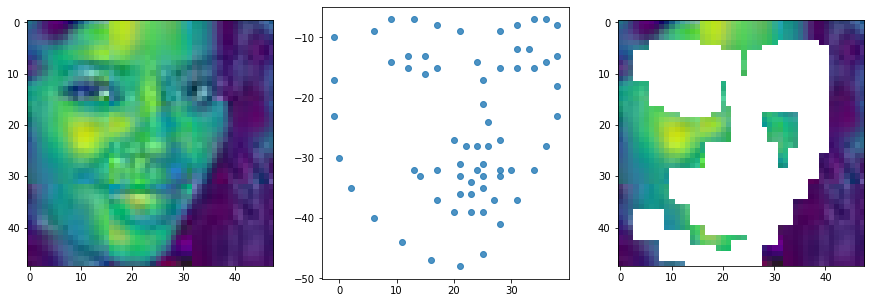

In [116]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 3, 1)
ax.imshow(img)
ax = fig.add_subplot(1, 3, 2)
ax.scatter(landmarks[:, 0], -landmarks[:, 1], alpha=0.8)
ax = fig.add_subplot(1, 3, 3)
img2 = img.copy()

for p in landmarks:
    img2[p[1]-3:p[1]+3, p[0]-3:p[0]+3, :] = (255, 255, 255)

ax.imshow(img2)
plt.show()

NameError: name 'left_eye' is not defined

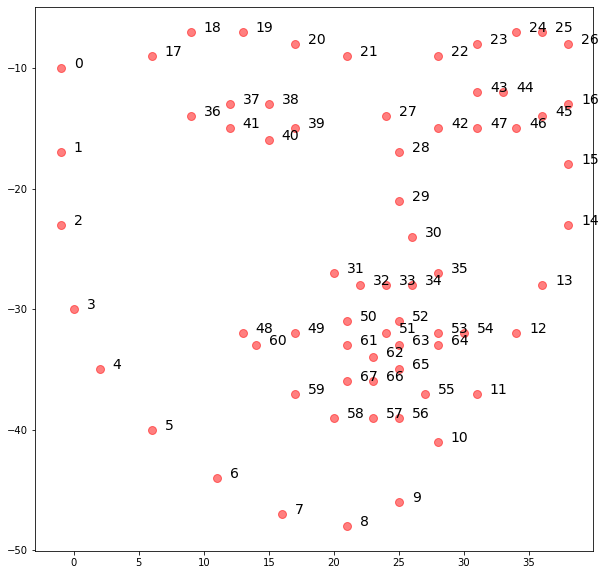

In [117]:
fig = plt.figure(figsize=(10,10))
plt.plot(landmarks[:,0], -landmarks[:,1], 'ro', markersize=8, alpha = 0.5)
for i in range(landmarks.shape[0]):
    plt.text(landmarks[i,0]+1, -landmarks[i,1], str(i), size=14)


left_eye_center = np.mean(landmarks[left_eye], axis=0)
right_eye_center = np.mean(landmarks[right_eye], axis=0)
print('Coordinates of the Left Eye: ', left_eye_center)
print('Coordinates of the Right Eye: ', right_eye_center)
plt.plot([left_eye_center[0]], [-left_eye_center[1]], 
            marker='+', color='blue', markersize=10, mew=4)

plt.plot([right_eye_center[0]], [-right_eye_center[1]], 
            marker='+', color='blue', markersize=10, mew=4)

plt.xticks([])
plt.yticks([])

plt.show()

TypeError: 'NoneType' object is not subscriptable

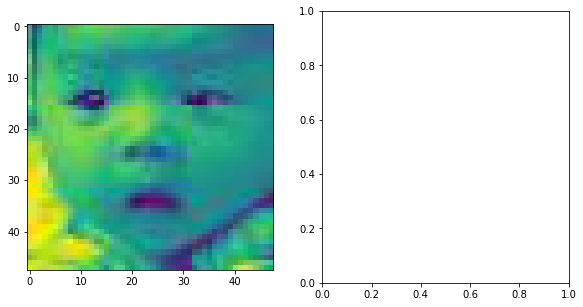

In [46]:
img2 = imageio.imread('img2.jpg')
landmarks = extract_face_landmarks(img2)

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 3, 1)
ax.imshow(img2)
ax = fig.add_subplot(1, 3, 2)
ax.scatter(landmarks[:, 0], -landmarks[:, 1], alpha=0.8)
ax = fig.add_subplot(1, 3, 3)
img0 = img2.copy()
for p in landmarks:
    img0[p[1]-1:p[1]+1, p[0]-1:p[0]+1, :] = (255, 255, 255)

ax.imshow(img0)
plt.show()